<a href="https://colab.research.google.com/github/PritamM24/Student-Performance-Prediction/blob/main/Student-Performance-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
!unzip student.zip


--2024-03-20 19:20:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.05s   

2024-03-20 19:20:04 (413 KB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [ ]:
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.read_csv('student-mat.csv', sep=';')

# Explore the data
print(df.head())
print(df.info())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

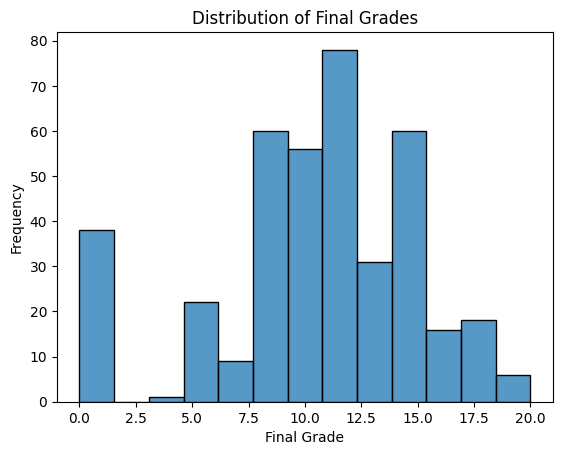

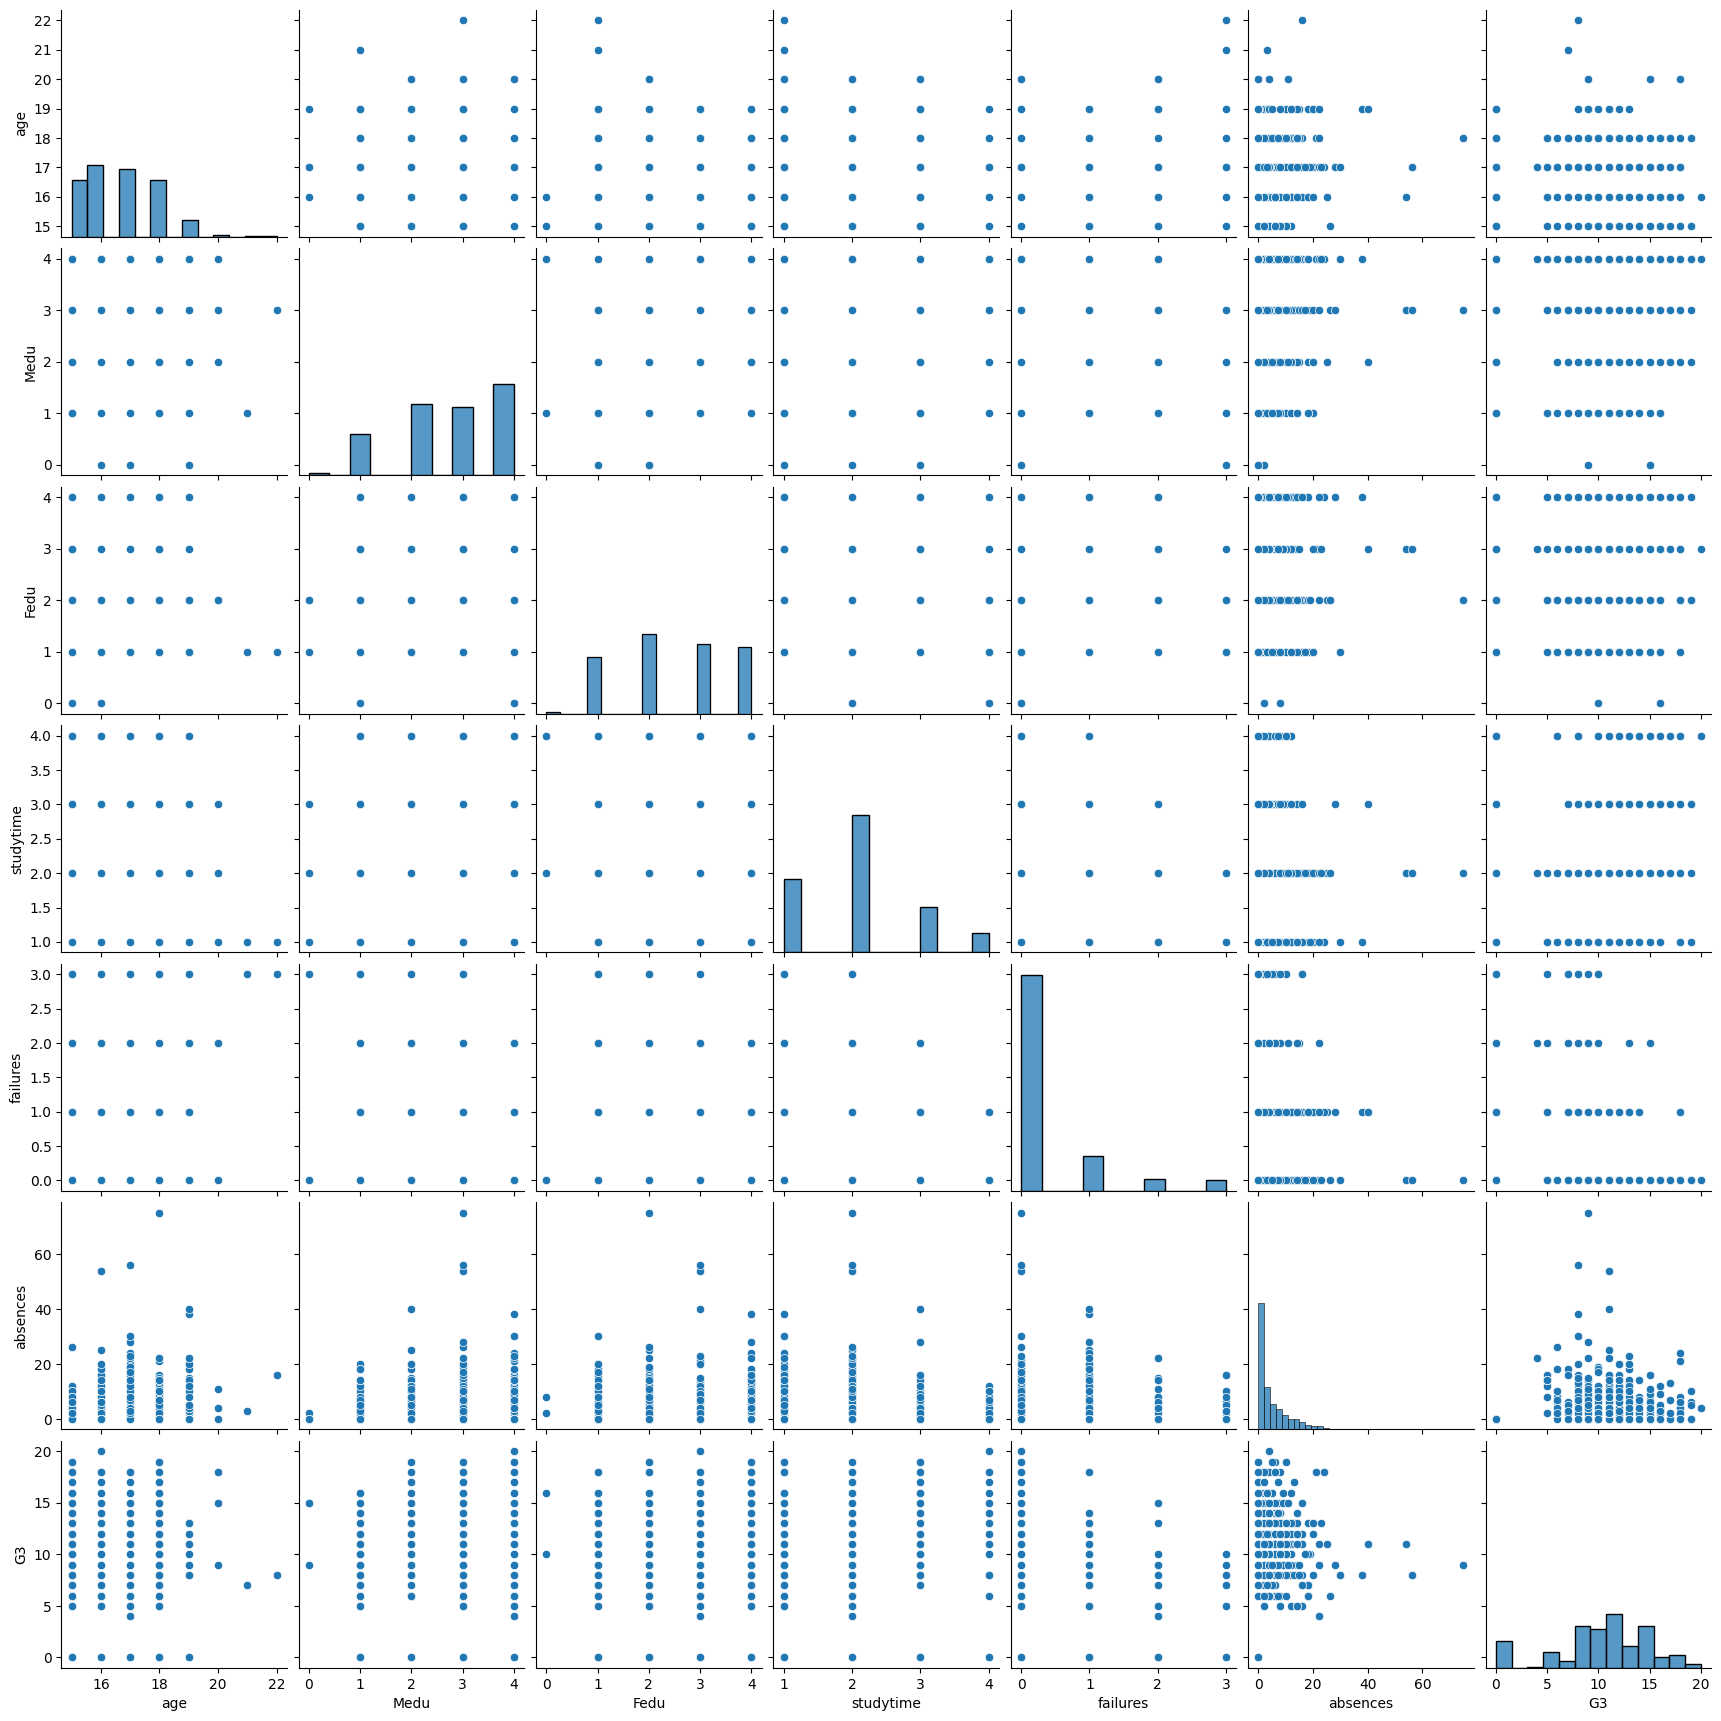

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of target variable (e.g., 'G3' - final grade)
sns.histplot(df['G3'])
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Final Grades')
plt.show()

# Explore relationships between features and target variable
sns.pairplot(df[['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences', 'G3']])
plt.show()


In [ ]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['G1', 'G2', 'G3'])  # Using G1 and G2 as features might lead to data leakage
y = df_encoded['G3']


In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 14.306448101265826


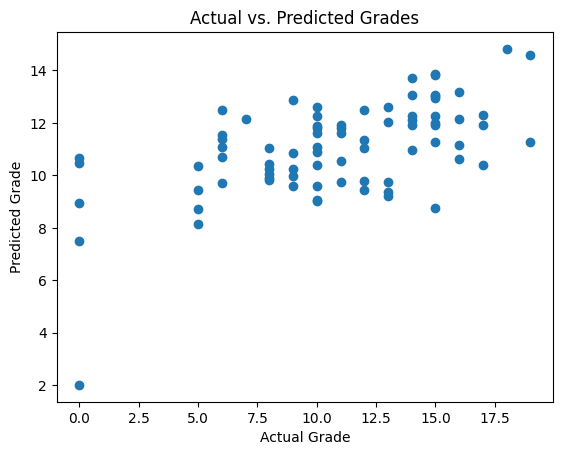

In [ ]:
# Visualize the predicted vs. actual grades
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs. Predicted Grades')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'student_performance_model.pkl')


['student_performance_model.pkl']